# Влияние среды распространения на форму сигнала и применение антенн для уменьшения искажений

In [1]:
# Imort 
import numpy as np
from scipy.fftpack import fft
# %config InlineBackend.figure_formats = ['svg']
# %matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt

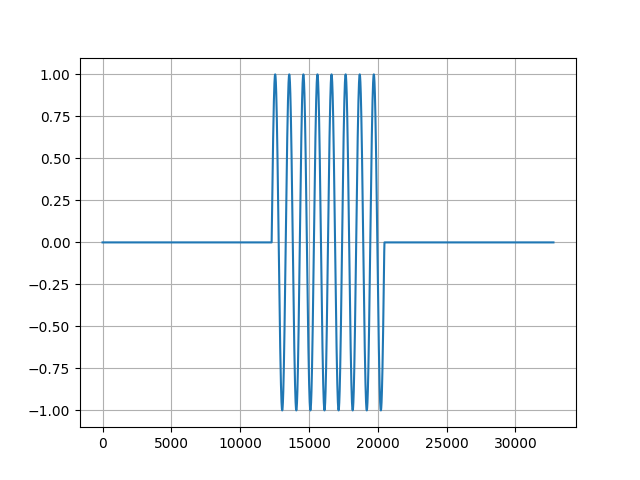

In [2]:
permission = 10
base_length = 2**(permission + 2)
base_t = np.array([i / 2**permission for i in range(base_length*2)])
base_signal = np.sin(base_t * 2 * np.pi)
signal = np.hstack((np.zeros(base_length*3), base_signal, np.zeros(base_length*3)))
length = len(signal)
t = np.array([i / 2**permission for i in range(length)])
fig_signal = plt.figure()
plt.grid()
plt.plot(signal)
plt.show()

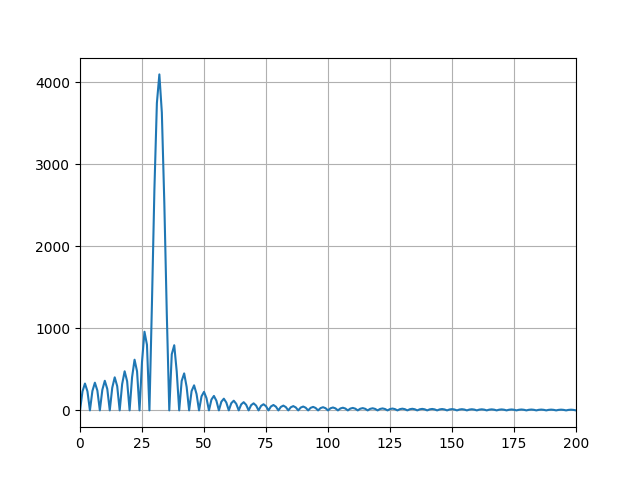

In [22]:
FFT_signal = np.fft.fft(signal)
FFT_length = len(FFT_signal)
fig_FFT = plt.figure()
plt.grid()
plt.xlim((0, 200))
plt.plot(np.abs(FFT_signal))
plt.show()

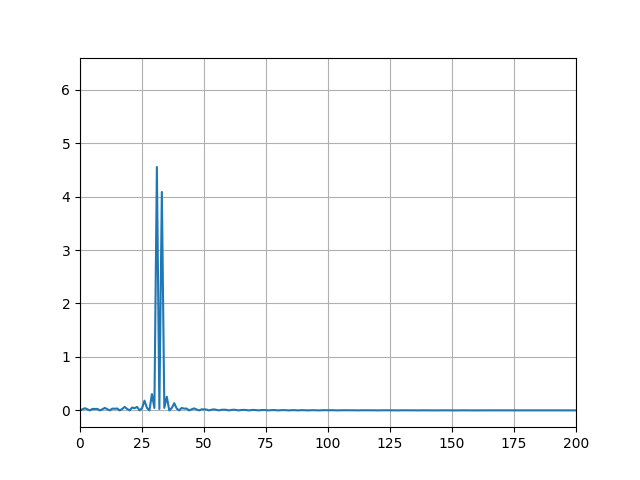

In [29]:
R = 100
c = 300000
E_d_E0 = 1/R * np.exp(-1j*(FFT_signal/c)*R)

FFT_signal_past = FFT_signal * E_d_E0**2
# FFT_signal_past = FFT_signal 
fig_FFT_past = plt.figure()
plt.grid()
plt.xlim((0, 200))
plt.plot(np.abs(FFT_signal_past))
plt.show()

Мне удалось пронаблюдать искажения fft, но только когда я использовал не весь спектр, или заполнял остатки нулями.

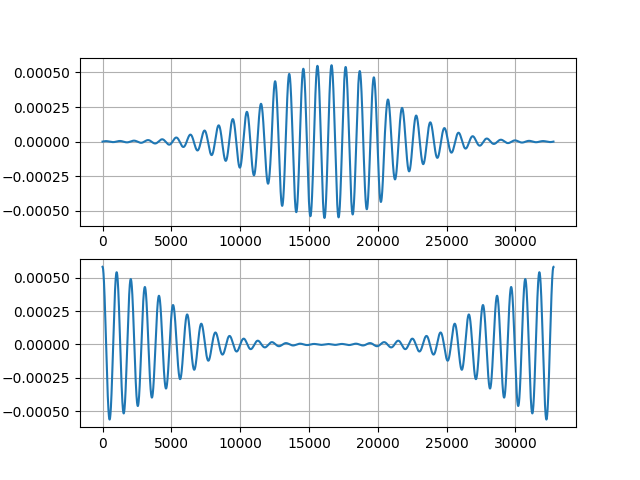

In [30]:
# Вот тут не уверен правиьно ли я понял 

signal_past = np.fft.ifft(FFT_signal_past)

fig_signal_past, (ax_re, ax_im) = plt.subplots(nrows=2, ncols=1)
# fig_signal_past, ax_re = plt.subplots(nrows=1, ncols=1)
ax_re.grid()
# ax_re.plot(signal_past)
ax_re.plot(signal_past.real)
ax_im.grid()
ax_im.plot(signal_past.imag)
plt.show()